<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/ITSAK/neuron_networks_to_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from numpy import asarray
from matplotlib import pyplot
import numpy as np
import pandas as pd
import re
import sympy
np.set_printoptions(suppress=True)

18/18 [==============================] - 0s 1ms/step


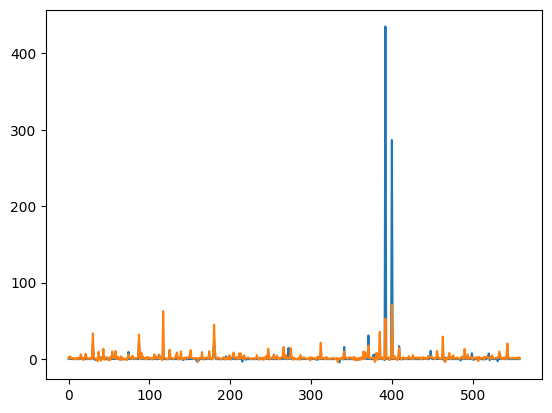

In [42]:
# load the data from the URL
data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/ITSAK/Ia-MR.csv')

# separate the input features (x) and target variable (y)
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

# scale the input features (x) using MinMaxScaler
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)

# select the target variable (y) as a pandas Series object
y = data['Ia']

# scale the target variable (y) using MinMaxScaler
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y.values.reshape(-1, 1))

# split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# define and train the model on the training data
model = Sequential()
model.add(Dense(5, input_dim=x_train.shape[1], activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(1, name='Output'))
model.compile(loss='mse', optimizer='adam')
model.fit(x_train, y_train, epochs=200, batch_size=10, verbose=0)

# evaluate the model on the test data
mse = model.evaluate(x_test, y_test)

# make predictions on the test data
yhat = model.predict(x_test)

# invert the scaling of the predictions and the target variable
y_test = scale_y.inverse_transform(y_test)
yhat = scale_y.inverse_transform(yhat)

# plot the predictions and the target variable
pyplot.plot(y_test)
pyplot.plot(yhat)
pyplot.show()


18/18 [==============================] - 0s 1ms/step
Mean Squared Error: 0.002153514651581645
Mean Absolute Error: 3.1822247727495085
Root Mean Squared Error: 20.46850272185697
R-squared: 0.1452409004163533


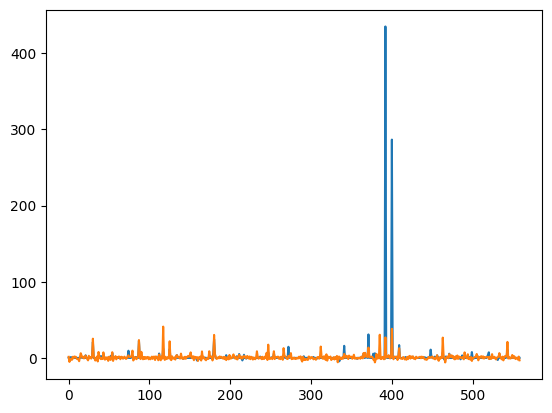

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot
import pandas as pd
from sklearn.model_selection import train_test_split

# load the data from the URL
data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/ITSAK/Ia-MR.csv')

# separate the input features (x) and target variable (y)
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

# scale the input features (x) using MinMaxScaler
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)

# select the target variable (y) as a pandas Series object
y = data['Ia']

# scale the target variable (y) using MinMaxScaler
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y.values.reshape(-1, 1))

# split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# define and train the model on the training data
model = Sequential()
model.add(Dense(5, input_dim=x_train.shape[1], activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(1, name='Output'))
model.compile(loss='mse', optimizer='adam')
model.fit(x_train, y_train, epochs=200, batch_size=10, verbose=0)

# evaluate the model on the test data
mse = model.evaluate(x_test, y_test)

# make predictions on the test data
yhat = model.predict(x_test)

# invert the scaling of the predictions and the target variable
y_test = scale_y.inverse_transform(y_test)
yhat = scale_y.inverse_transform(yhat)

# calculate additional performance metrics
mae = mean_absolute_error(y_test, yhat)
rmse = mean_squared_error(y_test, yhat, squared=False)
r2 = r2_score(y_test, yhat)

# print the performance metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

# plot the predictions and the target variable
pyplot.plot(y_test)
pyplot.plot(yhat)
pyplot.show()


<ipython-input-50-6c146862c3c0>:43: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


18/18 [==============================] - 0s 2ms/step


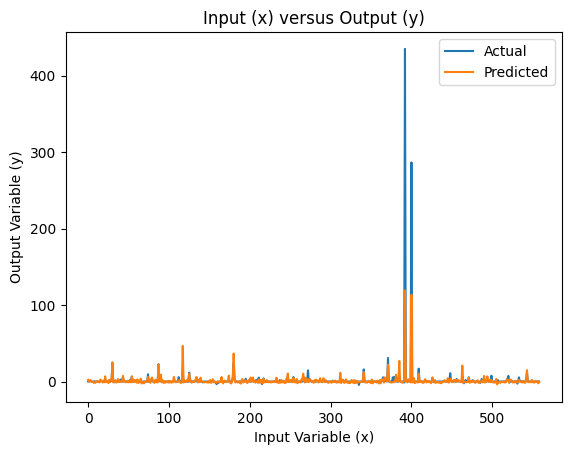

Mean Squared Error: 238.96501945604774
R2 Score: 0.5124648699523509


In [50]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the data from the URL
data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/ITSAK/Ia-MR.csv')

# separate the input features (x) and target variable (y)
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

# scale the input features (x) using MinMaxScaler
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)

# select the target variable (y) as a pandas Series object
y = data['Ia']

# scale the target variable (y) using MinMaxScaler
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y.values.reshape(-1, 1))

# split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# define the model architecture
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae'])
    return model

# create the KerasRegressor for GridSearchCV
model = KerasRegressor(build_fn=create_model, verbose=0)

# define the parameter grid for GridSearchCV
param_grid = {
    'batch_size': [16, 32],
    'epochs': [100, 200],
    'optimizer': ['adam', 'rmsprop']
}

# perform grid search for hyperparameter tuning
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

# get the best model from the grid search
best_model = grid.best_estimator_.model

# fine-tune the best model on the training data
best_model.fit(x_train, y_train, epochs=50, batch_size=16, verbose=0)

# evaluate the model on the test data
yhat = best_model.predict(x_test)

# invert the scaling of the predictions and the target variable
y_test = scale_y.inverse_transform(y_test)
yhat = scale_y.inverse_transform(yhat)

# calculate the performance metrics
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

# plot the predictions and the target variable
plt.plot(y_test, label='Actual')
plt.plot(yhat, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

# print the performance metrics
print('Mean Squared Error:', mse)
print('R2 Score:', r2)


In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# load the data from the URL
data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/ITSAK/Ia-MR.csv')

# separate the input features (x) and target variable (y)
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

# scale the input features (x) using MinMaxScaler
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)

# select the target variable (y) as a pandas Series object
y = data['Ia']

# scale the target variable (y) using MinMaxScaler
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y.values.reshape(-1, 1))

# split the data into training and test sets
kf = KFold(n_splits=10, shuffle=True, random_state=42)
x_train, x_test, y_train, y_test = None, None, None, None
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

# define the function to create the model
def create_model(neurons=1, activation='relu', optimizer='rmsprop', hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, input_dim=x_train.shape[1], activation=activation, kernel_initializer='he_uniform'))
    for i in range(hidden_layers):
        model.add(Dense(neurons, activation=activation, kernel_initializer='he_uniform'))
    model.add(Dense(1, name='Output'))
    model.compile(loss='mse', optimizer=optimizer)
    return model

# define the grid search parameters
param_grid = {
    'neurons': [1, 5, 10],
    'activation': ['relu', 'tanh'],
    'optimizer': ['rmsprop', 'adam'],
    'hidden_layers': [1, 2, 3]
}

# create the KerasRegressor model
model = KerasRegressor(build_fn=create_model, verbose=0)

# perform grid search using 10-fold cross validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=kf, scoring='neg_mean_squared_error')
grid_result = grid.fit(x_train, y_train)

# evaluate the best model on the test set
best_model = grid_result.best_estimator_.model
mse = best_model.evaluate(x_test, y_test)
yhat = best_model.predict(x_test)
y_test = scale_y.inverse_transform(y_test)
yhat = scale_y.inverse_transform(yhat)
r2 = r2_score(y_test, yhat)

# print the results
print('Best: {} using {}'.format(grid_result.best_score_, grid_result.best_params_))
print('MSE:', mse)
print('R2 Score:', r2)


<ipython-input-53-dc9f506ee548>:54: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


9/9 [==============================] - 0s 2ms/step
Best: -0.0011165030217751347 using {'activation': 'relu', 'hidden_layers': 3, 'neurons': 1, 'optimizer': 'rmsprop'}
MSE: 0.0006036167033016682
R2 Score: -0.0012340311651106717


In [55]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 KB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 69.4 MB/s eta 0:00:00


Trial 10 Complete [00h 04m 58s]
val_loss: 84.54356384277344

Best val_loss So Far: 72.31810760498047
Total elapsed time: 00h 15m 50s
Epoch 1/88
70/70 [==============================] - 1s 3ms/step - loss: 133.7785 - mean_squared_error: 133.7785
Epoch 2/88
70/70 [==============================] - 0s 3ms/step - loss: 129.7809 - mean_squared_error: 129.7809
Epoch 3/88
70/70 [==============================] - 0s 3ms/step - loss: 127.8853 - mean_squared_error: 127.8853
Epoch 4/88
70/70 [==============================] - 0s 3ms/step - loss: 127.1949 - mean_squared_error: 127.1949
Epoch 5/88
70/70 [==============================] - 0s 3ms/step - loss: 126.0422 - mean_squared_error: 126.0422
Epoch 6/88
70/70 [==============================] - 0s 3ms/step - loss: 125.6456 - mean_squared_error: 125.6456
Epoch 7/88
70/70 [==============================] - 0s 3ms/step - loss: 125.0159 - mean_squared_error: 125.0159
Epoch 8/88
70/70 [==============================] - 0s 3ms/step - loss: 124.9627 - 

18/18 [==============================] - 0s 2ms/step
MSE:  330.9151611328125
R2 score:  330.9151611328125


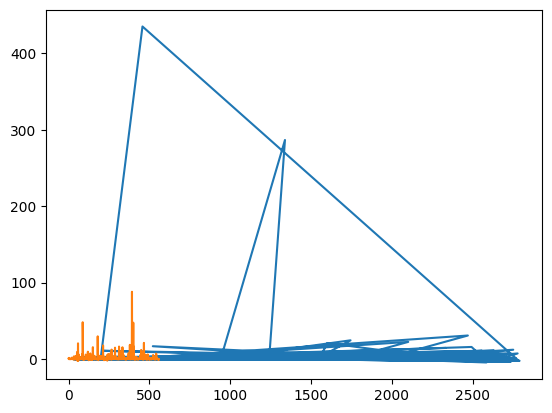

In [56]:
import pandas as pd
import autokeras as ak
from sklearn.model_selection import train_test_split

# load the data from the URL
data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/ITSAK/Ia-MR.csv')

# separate the input features (x) and target variable (y)
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

# split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# initialize the AutoKeras regressor and fit it to the training data
reg = ak.StructuredDataRegressor(max_trials=10, objective="val_loss")
reg.fit(x_train, y_train)

# evaluate the model on the test data
mse, r2 = reg.evaluate(x_test, y_test)

# make predictions on the test data
yhat = reg.predict(x_test)

# print the performance metrics
print('MSE: ', mse)
print('R2 score: ', r2)

# plot the predictions and the target variable
pyplot.plot(y_test)
pyplot.plot(yhat)
pyplot.show()


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import r2_score
from autokeras import StructuredDataRegressor

# load the data from the URL
data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/ITSAK/Ia-MR.csv')

# separate the input features (x) and target variable (y)
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

# scale the input features (x) using MinMaxScaler
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)

# select the target variable (y) as a pandas Series object
y = data['Ia']

# scale the target variable (y) using MinMaxScaler
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y.values.reshape(-1, 1))

# split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# define the model
model = Sequential()
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, name='Output'))

# compile the model
optimizer = RMSprop(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

# train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
history = model.fit(x_train, y_train, validation_split=0.2, epochs=1000, batch_size=10, verbose=1, callbacks=[early_stopping])

# make predictions on the test data
yhat = model.predict(x_test)

# invert the scaling of the predictions and the target variable
y_test = scale_y.inverse_transform(y_test)
yhat = scale_y.inverse_transform(yhat)

# calculate the R2 score
r2 = r2_score(y_test, yhat)
print('R2 Score:', r2)


Epoch 1/1000
179/179 [==============================] - 1s 3ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 5.2049e-04 - val_mse: 5.2049e-04
Epoch 2/1000
179/179 [==============================] - 0s 2ms/step - loss: 8.0535e-04 - mse: 8.0535e-04 - val_loss: 4.1856e-04 - val_mse: 4.1856e-04
Epoch 3/1000
179/179 [==============================] - 0s 2ms/step - loss: 7.2573e-04 - mse: 7.2573e-04 - val_loss: 4.3293e-04 - val_mse: 4.3293e-04
Epoch 4/1000
179/179 [==============================] - 0s 2ms/step - loss: 7.1739e-04 - mse: 7.1739e-04 - val_loss: 3.4461e-04 - val_mse: 3.4461e-04
Epoch 5/1000
179/179 [==============================] - 0s 2ms/step - loss: 6.7405e-04 - mse: 6.7405e-04 - val_loss: 3.6293e-04 - val_mse: 3.6293e-04
Epoch 6/1000
179/179 [==============================] - 0s 2ms/step - loss: 6.5894e-04 - mse: 6.5894e-04 - val_loss: 3.0808e-04 - val_mse: 3.0808e-04
Epoch 7/1000
179/179 [==============================] - 0s 2ms/step - loss: 6.4813e-04 - mse: 6.4813e-04 - v

In [58]:
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)

In [59]:
### Conversion to Basic Formula

# temp list as a container for each layer formulas
formula_list = []
# counter of hidden layers
f_n = 1
#
for i in range(len(model.layers)):
    # get ith Keras layer's weights and biases
    layer = model.layers[i]
    W = layer.get_weights()
    # empty text string to which concatenate current layer formula parts
    formula = ''
    # set script for input layer
    if i == 0:
        for i in range(W[0].shape[1]):
            cur_weight = np.sum(W[0][0,i])
            cur_bias = np.sum(W[1][i])
            # build formula for this layer
            formula += '*'+str(np.round(cur_weight,2))+'*'+'x+'+'*'+str(np.round(cur_bias,2)) + '*'+ '/'
        # append this layer formula to temp list
        formula_list.append(formula)

    # set script for hidden layers
    elif i < len(model.layers)-1:
        # start loop for next layer each neuron
        for c in range(W[0].shape[1]):
            cur_bias = np.sum(W[1][c])
            for i in range(W[0].shape[0]):
                cur_weight = np.sum(W[0][i, c])
                # build formula for this layer using previous layer formula
                formula += '*'+str(np.round(cur_weight,2))+'*'+'f'+str(f_n)+'('+formula_list[-1].split('/')[i]+')'+'f'+str(f_n)+'+'
            formula += '*'+str(np.round(cur_bias,2))+'*' + '/'
        # append this layer formula to temp list
        formula_list.append(formula)
        # increase index number for the next hidden layer
        f_n+=1
    # set script for output layer
    else:
        for i in range(W[0].shape[0]):
            cur_weight = np.sum(W[0][i, 0])
            # build formula for this layer using previous layer formula
            formula += '*'+str(np.round(cur_weight,2))+'*'+'f'+str(f_n)+'('+formula_list[-1].split('/')[i]+')'+'f'+str(f_n)+'+'
        cur_bias = np.sum(W[1][0])
        formula += '*'+str(np.round(cur_bias,2))+'*'
        # append this layer formula to temp list
        formula_list.append(formula)
# get last formula
formula = formula_list[-1]
# make some cleanings
formula = formula.replace('+*-','-')
formula = formula.replace('+*0.0*','')
formula = formula.replace('-*0.0*','')
formula = formula.replace('*','')
print(formula)

-0.16f3(0.08f2(-0.3f1(-0.75x+0.01)f1-0.21f1(-1.11x+0.03)f1+0.06f1(0.94x-0.08)f1+0.31f1(-0.79x)f1-0.32f1(0.42x-0.11)f1-0.39f1(0.92x-0.06)f1+0.3f1(-0.76x)f1-0.1f1(-0.36x)f1+0.01f1(0.47x-0.04)f1+0.17f1(0.35x+0.03)f1+0.12f1(0.67x-0.12)f1-0.19f1(0.01x+0.12)f1+0.18f1(-0.59x)f1-0.11f1(-1.01x+0.01)f1+0.21f1(-0.45x-0.02)f1+0.26f1(0.37x-0.04)f1-0.23f1(0.11x+0.09)f1+0.19f1(0.67x+0.03)f1-0.02f1(0.55x-0.17)f1+0.23f1(-1.0x)f1+0.27f1(0.12x-0.04)f1+0.31f1(-1.16x)f1-0.42f1(0.4x+0.01)f1-0.03f1(0.97x+0.04)f1+0.01f1(-0.53x+0.05)f1+0.25f1(0.88x-0.09)f1-0.19f1(-1.23x-0.01)f1+0.31f1(0.92x-0.13)f1+0.03f1(0.81x-0.2)f1+0.05f1(0.56x-0.23)f1-0.14f1(0.36x-0.03)f1-0.01f1(-0.32x)f1-0.01)f2+0.32f2(-0.03f1(-0.75x+0.01)f1+0.22f1(-1.11x+0.03)f1-0.2f1(0.94x-0.08)f1-0.32f1(-0.79x)f1-0.22f1(0.42x-0.11)f1+0.27f1(0.92x-0.06)f1-0.08f1(-0.76x)f1+0.26f1(-0.36x)f1-0.3f1(0.47x-0.04)f1+0.14f1(0.35x+0.03)f1-0.03f1(0.67x-0.12)f1-0.24f1(0.01x+0.12)f1-0.17f1(-0.59x)f1-0.34f1(-1.01x+0.01)f1-0.27f1(-0.45x-0.02)f1-0.01f1(0.37x-0.04)f1+0.

In [60]:
# create LaTeX code
def latex_activation_function(x):
    return '\\frac{e^{'+x+'} - e^{-'+x+'}}{e^{'+x+'} + e^{-'+x+'}}'


formula_latex = formula
for i in range(1,f_n+1):
    exist = True
    while exist:
        try:
            pattern = 'f'+str(i)+'(.*?)'+'f'+str(i)
            substring = re.search(pattern, formula_latex).group(1)
            start = re.search(pattern, formula_latex).start()
            formula_latex = formula_latex[:start] + latex_activation_function(substring) + formula_latex[start + 4 + len(substring):]
        except:
            exist = False

print(formula_latex)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [61]:
# Create numpy formula
def numpy_activation_function(x):
    return '(np.exp('+x+') - np.exp(-'+x+'))/(np.exp('+x+') + np.exp(-'+x+'))'


formula_numpy = formula
for i in range(1,f_n+1):
    exist = True
    while exist:
        try:
            pattern = 'f'+str(i)+'(.*?)'+'f'+str(i)
            substring = re.search(pattern, formula_numpy).group(1)
            start = re.search(pattern, formula_numpy).start()
            formula_numpy = formula_numpy[:start] + numpy_activation_function(substring) + formula_numpy[start + 4 + len(substring):]
        except:
            exist = False

formula_numpy = formula_numpy.replace('(np', '*(np')
formula_numpy = formula_numpy.replace('x-', '*x-')
formula_numpy = formula_numpy.replace('x+', '*x+')
formula_numpy = formula_numpy.replace('/*', '/')

print(formula_numpy)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [62]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
from matplotlib import rc
rc("text", usetex=False)
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(22, 2), tight_layout=True)
plt.axis('off')
ax.text(0,0.5,r'$'+formula_latex+'$', fontsize=16, color='r', )
plt.show()

KeyboardInterrupt: ignored

In [64]:
!pip install sklearn-extensions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn-extensions: filename=sklearn_extensions-0.0.2-py2.py3-none-any.whl size=24579 sha256=79a7dc82acbc08ca80aaa3707088f42b921f502b28015030c978a4157b79cd04
  Stored in directory: /root/.cache/pip/wheels/5b/4f/12/e56caf24d4ce8e90d3734238d9307c12b1d6c1a211889d85a4
Successfully built sklearn-extensions


In [66]:
!pip install scikit-elm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.linalg import pinv

import pandas as pd
import numpy as np

# load the data from the URL
data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/ITSAK/Ia-MR.csv')

# separate the input features (x) and target variable (y)
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

# scale the input features (x) using MinMaxScaler
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)

# select the target variable (y) as a pandas Series object
y = data['Ia']

# scale the target variable (y) using MinMaxScaler
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y.values.reshape(-1, 1))

# split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# define and train the ELM model on the training data
n_hidden = 10
input_size = x_train.shape[1]
bias_scale = 0.1
weights_scale = 1.0
X = np.hstack((np.ones((x_train.shape[0], 1), dtype=x_train.dtype) * bias_scale, x_train))
Xt = np.hstack((np.ones((x_test.shape[0], 1), dtype=x_test.dtype) * bias_scale, x_test))
beta = np.random.randn(input_size + 1, n_hidden) * weights_scale
H = np.maximum(X.dot(beta), 0)
Ht = np.maximum(Xt.dot(beta), 0)
output_weights = pinv(H).dot(y_train)

# predict on the test set
yhat = Ht.dot(output_weights)

# invert the scaling of the predictions and the target variable
y_test = scale_y.inverse_transform(y_test)
yhat = scale_y.inverse_transform(yhat)

# calculate performance metrics
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print(f"MSE: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")


MSE: 459.1918
R2 Score: 0.0632


In [72]:
!pip install git+https://github.com/masaponto/python-elm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/masaponto/python-elm to /tmp/pip-req-build-271stnhj
  Running command git clone --filter=blob:none --quiet https://github.com/masaponto/python-elm /tmp/pip-req-build-271stnhj
  Resolved https://github.com/masaponto/python-elm to commit b253b5c262efeb1f8eeb5e14b55f98778409b54d
  Preparing metadata (setup.py) ... done
  Created wheel for elm: filename=elm-0.4.1-py3-none-any.whl size=5443 sha256=14585c0fa5fde7ef983950ee1aa17b70e70b73079aaac069a43e9c71f6001ebd
  Stored in directory: /tmp/pip-ephem-wheel-cache-9zmxdeth/wheels/b9/e1/ed/20b94c26fc534ccf3ef2a54a0bf5c183aede5f53a235a8547c
Successfully built elm


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

import pandas as pd
import numpy as np

# load the data from the URL
data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/ITSAK/Ia-MR.csv')

# separate the input features (x) and target variable (y)
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

# scale the input features (x) using MinMaxScaler
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)

# select the target variable (y) as a pandas Series object
y = data['Ia']

# scale the target variable (y) using MinMaxScaler
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y.values.reshape(-1, 1))

# split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# define and train the model on the training data
model = Sequential()
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer=Adam(lr=0.001))
model.fit(x_train, y_train, epochs=200, batch_size=10, verbose=0)

# evaluate the model on the test data
yhat = model.predict(x_test)
y_test = scale_y.inverse_transform(y_test)
yhat = scale_y.inverse_transform(yhat)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print("MSE:", mse)
print("R2 Score:", r2)


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


18/18 [==============================] - 0s 1ms/step
MSE: 285.8194766247175
R2 Score: 0.416872661849939


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# load data
data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/ITSAK/Ia-MR.csv')

# separate the input features (x) and target variable (y)
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

# scale the input features (x) using MinMaxScaler
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)

# select the target variable (y) as a pandas Series object
y = data['Ia']

# scale the target variable (y) using MinMaxScaler
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y.values.reshape(-1, 1))

# split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# create the FFNN model
model = Sequential()
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer)

# train the model
model.fit(x_train, y_train, epochs=500, batch_size=32, validation_data=(x_test, y_test), verbose=0)

# evaluate the model on the test data
mse = model.evaluate(x_test, y_test)

# make predictions on the test data
yhat = model.predict(x_test)

# invert the scaling of the predictions and the target variable
y_test = scale_y.inverse_transform(y_test)
yhat = scale_y.inverse_transform(yhat)

# calculate R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, yhat)

# print performance metrics
print('MSE:', mse)
print('R2 Score:', r2)


18/18 [==============================] - 0s 1ms/step
MSE: 0.0010767537169158459
R2 Score: 0.5726218533359735


In [5]:
# import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# load the data from the URL
data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/ITSAK/Ia-MR.csv')

# separate the input features (x) and target variable (y)
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

# split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# define and train the random forest model on the training data
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(x_train, y_train)

# make predictions on the test data
yhat = model.predict(x_test)

# calculate performance metrics
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

# print performance metrics
print('MSE:', mse)
print('R2 score:', r2)


MSE: 245.03045586272893
R2 score: 0.5000901996593585


In [6]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

# load the data
data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/ITSAK/Ia-MR.csv')

# separate the input features (x) and target variable (y)
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# define the lazy regressor and fit on the training data
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

# view the performance of the models
print(models)


 64%|██████▍   | 27/42 [00:16<00:19,  1.31s/it]